In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2022-12-27 00:39:25--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   149MB/s    in 0.4s    

2022-12-27 00:39:25 (149 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
EPOCHS = 20

model = create_model()

history = model.fit(
      train_generator,
      steps_per_epoch=100,  
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50, 
      verbose=2)

Epoch 1/20
100/100 - 19s - loss: 0.6888 - accuracy: 0.5370 - val_loss: 0.6664 - val_accuracy: 0.5740 - 19s/epoch - 194ms/step
Epoch 2/20
100/100 - 9s - loss: 0.6446 - accuracy: 0.6195 - val_loss: 0.6202 - val_accuracy: 0.6710 - 9s/epoch - 85ms/step
Epoch 3/20
100/100 - 9s - loss: 0.5935 - accuracy: 0.6875 - val_loss: 0.6204 - val_accuracy: 0.6370 - 9s/epoch - 85ms/step
Epoch 4/20
100/100 - 9s - loss: 0.5529 - accuracy: 0.7235 - val_loss: 0.5914 - val_accuracy: 0.6840 - 9s/epoch - 86ms/step
Epoch 5/20
100/100 - 9s - loss: 0.5297 - accuracy: 0.7360 - val_loss: 0.5661 - val_accuracy: 0.7140 - 9s/epoch - 85ms/step
Epoch 6/20
100/100 - 10s - loss: 0.5052 - accuracy: 0.7490 - val_loss: 0.5684 - val_accuracy: 0.7070 - 10s/epoch - 101ms/step
Epoch 7/20
100/100 - 9s - loss: 0.4777 - accuracy: 0.7740 - val_loss: 0.5477 - val_accuracy: 0.7260 - 9s/epoch - 86ms/step
Epoch 8/20
100/100 - 9s - loss: 0.4484 - accuracy: 0.7915 - val_loss: 0.5445 - val_accuracy: 0.7290 - 9s/epoch - 86ms/step
Epoch 9/20

In [6]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

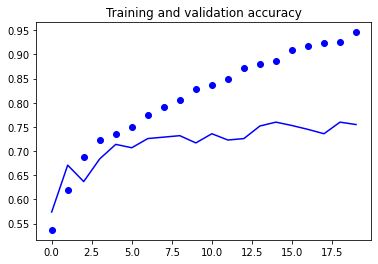

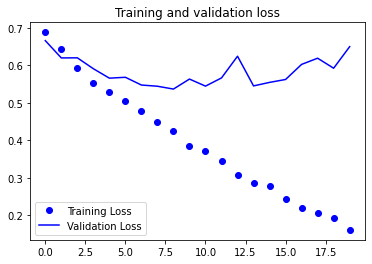

In [7]:
plot_loss_acc(history)

In [8]:
model_for_aug = create_model()

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50, 
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 23s - loss: 0.6921 - accuracy: 0.5220 - val_loss: 0.6726 - val_accuracy: 0.5440 - 23s/epoch - 227ms/step
Epoch 2/20
100/100 - 17s - loss: 0.6788 - accuracy: 0.5545 - val_loss: 0.6454 - val_accuracy: 0.6200 - 17s/epoch - 167ms/step
Epoch 3/20
100/100 - 18s - loss: 0.6630 - accuracy: 0.5975 - val_loss: 0.6382 - val_accuracy: 0.6480 - 18s/epoch - 183ms/step
Epoch 4/20
100/100 - 17s - loss: 0.6467 - accuracy: 0.6080 - val_loss: 0.6048 - val_accuracy: 0.6710 - 17s/epoch - 166ms/step
Epoch 5/20
100/100 - 17s - loss: 0.6261 - accuracy: 0.6410 - val_loss: 0.5926 - val_accuracy: 0.6730 - 17s/epoch - 166ms/step
Epoch 6/20
100/100 - 17s - loss: 0.6164 - accuracy: 0.6495 - val_loss: 0.5772 - val_accuracy: 0.6950 - 17s/epoch - 173ms/step
Epoch 7/20
100/100 - 17s - loss: 0.6071 - accuracy: 0.6760 - val_loss: 0.5881 - val_accuracy: 0.6840 - 17s/epoch - 168ms/step
Epoch 8/20
100/100 - 17s - loss: 0

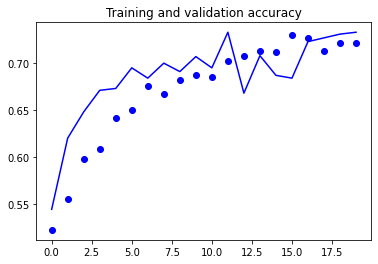

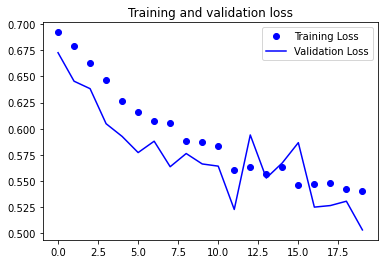

In [9]:
plot_loss_acc(history_with_aug)